In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('car.csv')
df
#data processing

,Car_Model,Mileage,Sell_Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
dummies=pd.get_dummies(df.Car_Model)
dummies
#creating dummy for cars name 

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
merged = pd.concat([df,dummies],axis=1)
merged

,Car_Model,Mileage,Sell_Price,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [6]:
final = merged.drop(['Car_Model','Mercedez Benz C class'],axis=1)
final


,Mileage,Sell_Price,Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


Text(0, 0.5, 'Age(yrs)')

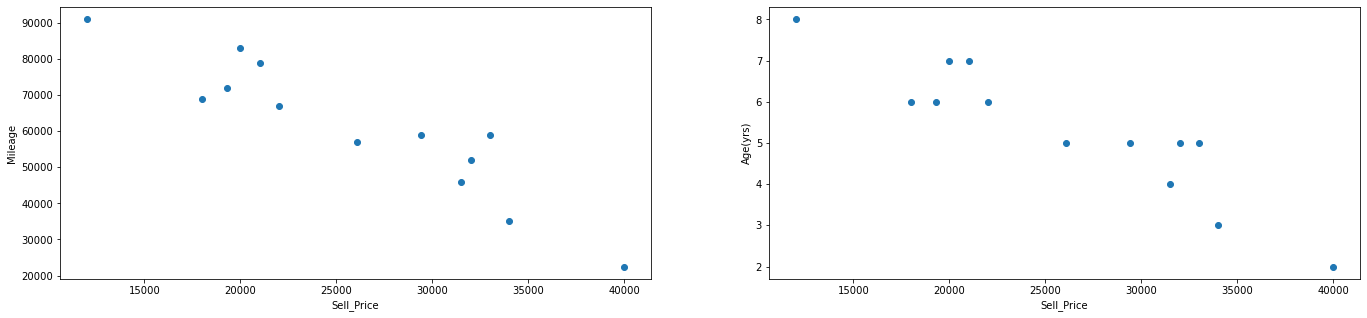

In [7]:
plt.figure(figsize=(36,5))
plt.subplot(131)
plt.scatter(final['Sell_Price'],final['Mileage'])
plt.xlabel("Sell_Price")
plt.ylabel('Mileage')
plt.subplot(132)
plt.scatter(final['Sell_Price'],final['Age(yrs)'])
plt.xlabel("Sell_Price")
plt.ylabel('Age(yrs)')
#checking it has linear relation or not 

In [8]:
x= final[['Mileage','Age(yrs)','Audi A5','BMW X5']]
y=final.Sell_Price
x 


,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [9]:
x_train,x_test , y_train,y_test =train_test_split(x,y,test_size=0.2)
y_train
#getting train and test data

1     34000
2     26100
12    33000
6     32000
9     22000
4     31500
7     19300
11    21000
5     29400
8     12000
Name: Sell_Price, dtype: int64

In [10]:
reg=LinearRegression()


In [11]:
reg.fit(x_train,y_train)
#training our model

LinearRegression()

In [12]:
reg.predict(x_test)
#testing the model 

array([18050.4784689 , 18888.83572568, 42408.45295056])

In [13]:
reg.score(x_test,y_test)
#checking accuracy of the model

0.964894227153655

In [14]:
reg.predict([[3500,6,0,0]])
#deploying the model

array([55237.32057416])

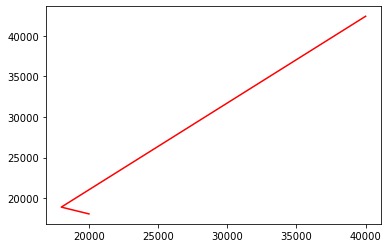

In [26]:
#plt.scatter(final.Mileage,final.Sell_Price,color='yellow',marker='*')
#plt.scatter(final.Age(yrs),final.Sell_Price,color='green',marker='+')
plt.plot(y_test,reg.predict(x_test),color='red')